<a href="https://colab.research.google.com/gist/Chetan2812004/cf8db606ff39071326fa532ac59852a2/adani-interprise-stock-analysis-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load Data from Google Drive
file_path = "/content/sample_data/cpproject.xlsx"  # Update with your actual file path

# Read the Excel file
df = pd.read_excel(file_path)

# Show the first few rows of data
df.head()



Date         Day     Month Quarter  Year series     OPEN    HIGH   \
0  7-Feb-25     Friday  February      Q1  2025      EQ  2312.45  2374.9   
1  6-Feb-25   Thursday  February      Q1  2025      EQ  2340.00  2340.0   
2  5-Feb-25  Wednesday  February      Q1  2025      EQ  2314.95  2349.4   
3  4-Feb-25    Tuesday  February      Q1  2025      EQ  2278.90  2312.0   
4  3-Feb-25     Monday  February      Q1  2025      EQ  2266.75  2279.0   

      LOW   PREV. CLOSE      ltp    close     vwap   52W H   52W L   VOLUME   \
0  2307.35       2312.45  2340.00  2338.80  2340.71  3743.9  2025.0   892900   
1  2298.20       2324.60  2309.00  2312.45  2313.94  3743.9  2025.0   680544   
2  2309.05       2301.50  2326.80  2324.60  2325.60  3743.9  2025.0   560940   
3  2267.55       2261.85  2303.25  2301.50  2295.26  3743.9  2025.0   691187   
4  2213.90       2270.00  2266.90  2261.85  2247.60  3743.9  2025.0   824942   

   No of trades   
0          65292  
1          56800  
2          43537  
3          55343  
4          63131

In [ ]:
# Print actual column names to check for issues
print("Column Names:", df.columns)

# Trim spaces and rename the 'Date' column if necessary
df.rename(columns=lambda x: x.strip(), inplace=True)

# If the column is named differently (e.g., ' date '), rename it explicitly
possible_date_columns = [col for col in df.columns if 'date' in col.lower()]
if possible_date_columns:
    df.rename(columns={possible_date_columns[0]: 'Date'}, inplace=True)

# Convert 'Date' column to proper datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Sort data by Date
df = df.sort_values(by='Date')

# Display the first few rows to verify
df.head()

Column Names: Index(['Date ', 'Day', 'Month', 'Quarter', 'Year', 'series ', 'OPEN ', 'HIGH ',
       'LOW ', 'PREV. CLOSE ', 'ltp ', 'close ', 'vwap ', '52W H ', '52W L ',
       'VOLUME ', 'No of trades '],
      dtype='object')


<ipython-input-9-638d20cb9c9c>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


Date        Day     Month Quarter  Year series     OPEN     HIGH  \
250 2024-02-08   Thursday  February      Q1  2024     EQ  3245.60  3245.60   
249 2024-02-09     Friday  February      Q1  2024     EQ  3184.45  3224.95   
248 2024-02-12     Monday  February      Q1  2024     EQ  3229.00  3241.95   
247 2024-02-13    Tuesday  February      Q1  2024     EQ  3180.00  3194.00   
246 2024-02-14  Wednesday  February      Q1  2024     EQ  3184.00  3255.25   

         LOW  PREV. CLOSE     ltp    close     vwap    52W H    52W L  \
250  3146.10      3229.85  3179.0  3168.60  3186.56  3277.95  1103.75   
249  3121.20      3168.60  3215.0  3215.20  3182.28  3277.95  1103.75   
248  3160.00      3215.20  3166.0  3169.75  3193.32  3277.95  1103.75   
247  3092.05      3169.75  3180.0  3178.45  3142.91  3277.95  1103.75   
246  3169.85      3178.45  3202.0  3207.20  3212.71  3277.95  1103.75   

      VOLUME  No of trades  
250  1679004        126898  
249  1572789         92034  
248  1083138         64420  
247  1225207         73578  
246  1741264        101676

Column Names: Index(['Date ', 'Day', 'Month', 'Quarter', 'Year', 'series ', 'OPEN ', 'HIGH ',
       'LOW ', 'PREV. CLOSE ', 'ltp ', 'close ', 'vwap ', '52W H ', '52W L ',
       'VOLUME ', 'No of trades '],
      dtype='object')


<ipython-input-14-bc3a7035553c>:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


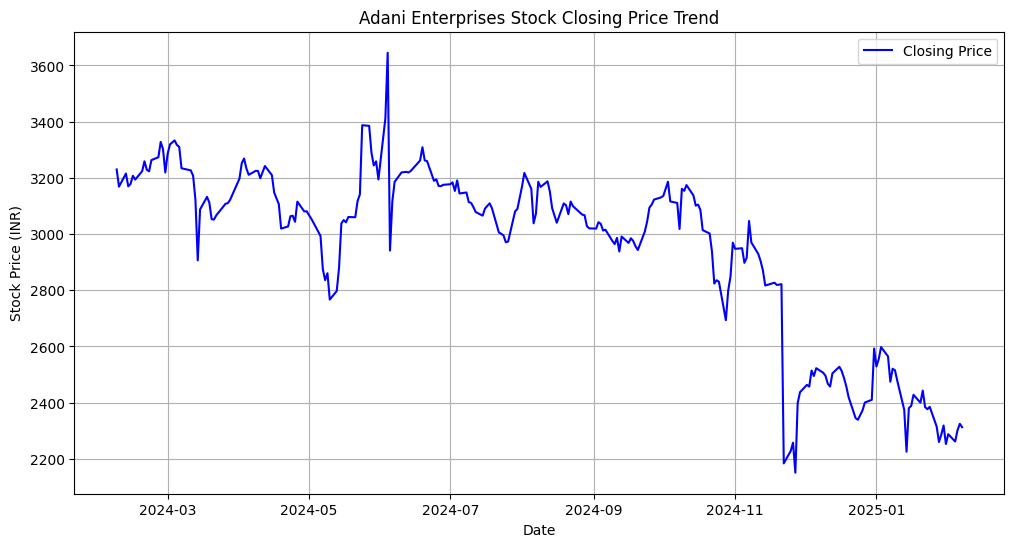

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load Data from Google Drive
file_path = "/content/sample_data/cpproject.xlsx"  # Update with your actual file path

# Read the Excel file
df = pd.read_excel(file_path)

# Show the first few rows of data
df.head()

# Print actual column names to check for issues
print("Column Names:", df.columns)

# Trim spaces and rename the 'Date' column if necessary
df.rename(columns=lambda x: x.strip(), inplace=True)

# If the column is named differently (e.g., ' date '), rename it explicitly
possible_date_columns = [col for col in df.columns if 'date' in col.lower()]
if possible_date_columns:
    df.rename(columns={possible_date_columns[0]: 'Date'}, inplace=True)

# Convert 'Date' column to proper datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Sort data by Date
df = df.sort_values(by='Date')

# Display the first few rows to verify
df.head()

# Check if 'Close' column exists. If not, find the correct column name
if 'Close' not in df.columns:
    # Assuming closing price is in a column containing 'close' (case-insensitive)
    close_column = next((col for col in df.columns if 'close' in col.lower()), None)
    if close_column:
        # Rename the column to 'Close'
        df.rename(columns={close_column: 'Close'}, inplace=True)
    else:
        raise KeyError("Could not find a column representing closing price. Please check your data.")

# Plot the stock closing price trend
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Stock Price (INR)')
plt.title('Adani Enterprises Stock Closing Price Trend')
plt.legend()
plt.grid()
plt.show()

Column Names: Index(['Date ', 'Day', 'Month', 'Quarter', 'Year', 'series ', 'OPEN ', 'HIGH ',
       'LOW ', 'PREV. CLOSE ', 'ltp ', 'close ', 'vwap ', '52W H ', '52W L ',
       'VOLUME ', 'No of trades '],
      dtype='object')


<ipython-input-15-09af4cb4042f>:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


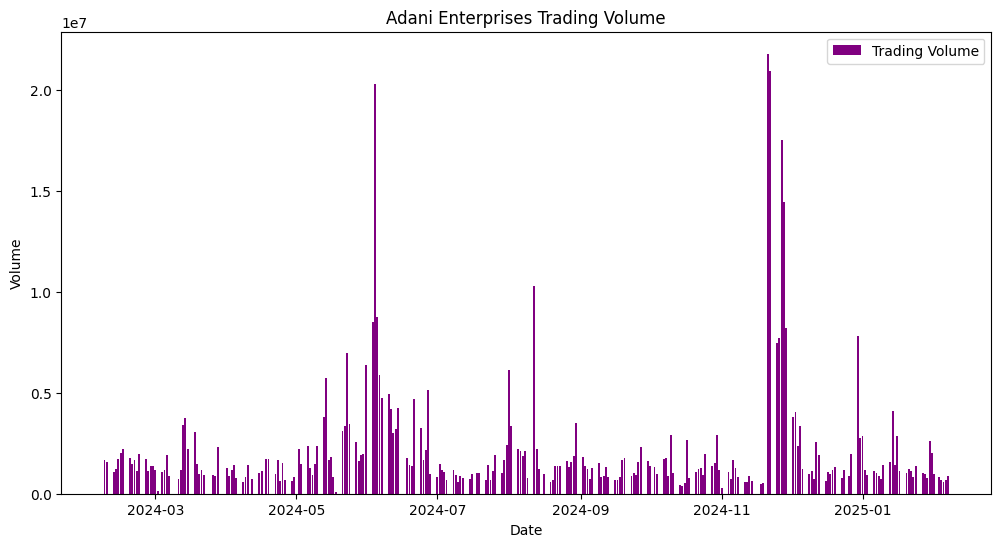

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load Data from Google Drive
file_path = "/content/sample_data/cpproject.xlsx"  # Update with your actual file path

# Read the Excel file
df = pd.read_excel(file_path)

# Show the first few rows of data
df.head()

# Print actual column names to check for issues
print("Column Names:", df.columns)

# Trim spaces and rename the 'Date' column if necessary
df.rename(columns=lambda x: x.strip(), inplace=True)

# If the column is named differently (e.g., ' date '), rename it explicitly
possible_date_columns = [col for col in df.columns if 'date' in col.lower()]
if possible_date_columns:
    df.rename(columns={possible_date_columns[0]: 'Date'}, inplace=True)

# Convert 'Date' column to proper datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Sort data by Date
df = df.sort_values(by='Date')

# Display the first few rows to verify
df.head()


# --- Modification starts here ---

# Check for volume column name (case-insensitive)
volume_column = next((col for col in df.columns if 'volume' in col.lower()), None)

# If the volume column is found, rename it to 'Volume'
if volume_column:
    df.rename(columns={volume_column: 'Volume'}, inplace=True)
else:
    raise KeyError("Could not find a column representing volume. Please check your data.")

# --- Modification ends here ---


plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Volume'], color='purple', label='Trading Volume')  # Now use 'Volume'
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Adani Enterprises Trading Volume')
plt.legend()
plt.show()

Column Names: Index(['Date ', 'Day', 'Month', 'Quarter', 'Year', 'series ', 'OPEN ', 'HIGH ',
       'LOW ', 'PREV. CLOSE ', 'ltp ', 'close ', 'vwap ', '52W H ', '52W L ',
       'VOLUME ', 'No of trades '],
      dtype='object')


<ipython-input-16-1f0100a3c9e6>:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


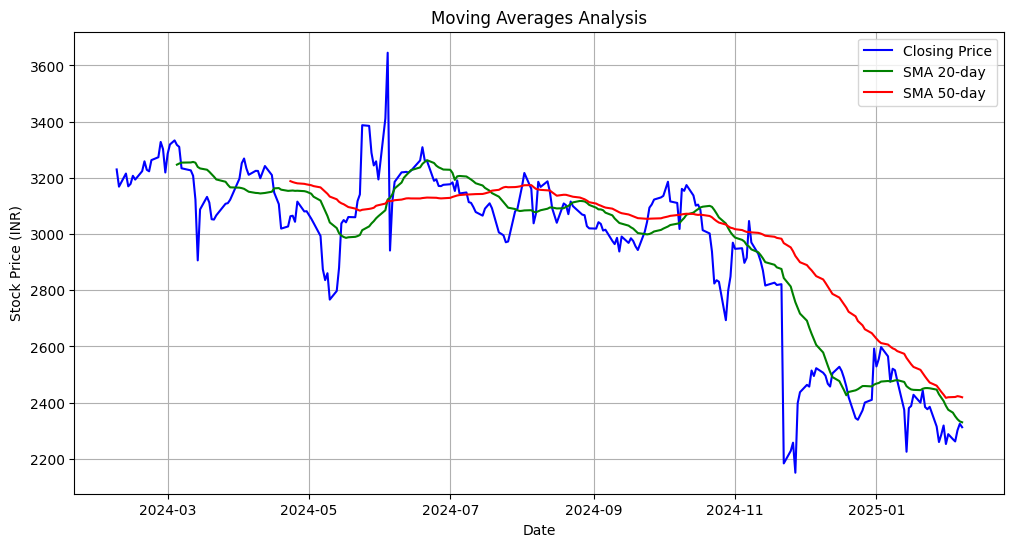

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load Data from Google Drive
file_path = "/content/sample_data/cpproject.xlsx"  # Update with your actual file path

# Read the Excel file
df = pd.read_excel(file_path)

# Show the first few rows of data
df.head()

# Print actual column names to check for issues
print("Column Names:", df.columns)

# Trim spaces and rename the 'Date' column if necessary
df.rename(columns=lambda x: x.strip(), inplace=True)

# If the column is named differently (e.g., ' date '), rename it explicitly
possible_date_columns = [col for col in df.columns if 'date' in col.lower()]
if possible_date_columns:
    df.rename(columns={possible_date_columns[0]: 'Date'}, inplace=True)

# Convert 'Date' column to proper datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Sort data by Date
df = df.sort_values(by='Date')

# Display the first few rows to verify
df.head()

# Check if 'Close' column exists. If not, find the correct column name
if 'Close' not in df.columns:
    # Assuming closing price is in a column containing 'close' (case-insensitive)
    close_column = next((col for col in df.columns if 'close' in col.lower()), None)
    if close_column:
        # Rename the column to 'Close'
        df.rename(columns={close_column: 'Close'}, inplace=True)
    else:
        raise KeyError("Could not find a column representing closing price. Please check your data.")

# Calculate 20-day and 50-day moving averages
df['SMA_20'] = df['Close'].rolling(window=20).mean() # Now uses 'Close' if it exists or the renamed column
df['SMA_50'] = df['Close'].rolling(window=50).mean() # Now uses 'Close' if it exists or the renamed column


# Plot Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label="Closing Price", color='blue') #Now uses 'Close' if it exists or the renamed column
plt.plot(df['Date'], df['SMA_20'], label="SMA 20-day", color='green')
plt.plot(df['Date'], df['SMA_50'], label="SMA 50-day", color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price (INR)')
plt.title('Moving Averages Analysis')
plt.legend()
plt.grid()
plt.show()